In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [155]:
df = pd.read_csv('Battery_data.csv')

In [156]:
df.head()

,Date,Beat,CrimeCount,Year,Month,DayWeek,Hour
0,2010-01-01,112,1,2010,1,4,0
1,2010-01-01,132,10,2010,1,4,0
2,2010-01-01,133,1,2010,1,4,0
3,2010-01-01,212,1,2010,1,4,0
4,2010-01-01,213,2,2010,1,4,0


In [158]:
df_sarima = df.set_index('Date')

In [160]:
##I will be using y_exp to try and model the crime data for beat 421
y_exp = df_sarima.loc[df_sarima['Beat'] == 421]

In [161]:
y_exp = y_exp['CrimeCount']

In [184]:
y_exp = y_exp.reset_index()

In [188]:
y_exp['Date'][0]

'2010-01-01'

In [191]:
y_exp['Date'] = y_exp['Date'].apply(lambda x: pd.to_datetime(x, format = '%Y-%m-%d'))

In [192]:
y_exp.set_index('Date', inplace = True)

In [193]:
y_exp.head()

,CrimeCount
Date,
2010-01-01,1
2010-01-02,1
2010-01-03,1
2010-01-04,1
2010-01-05,2


In [52]:
df.set_index('Date', inplace = True)

In [209]:
from IPython.display import Image

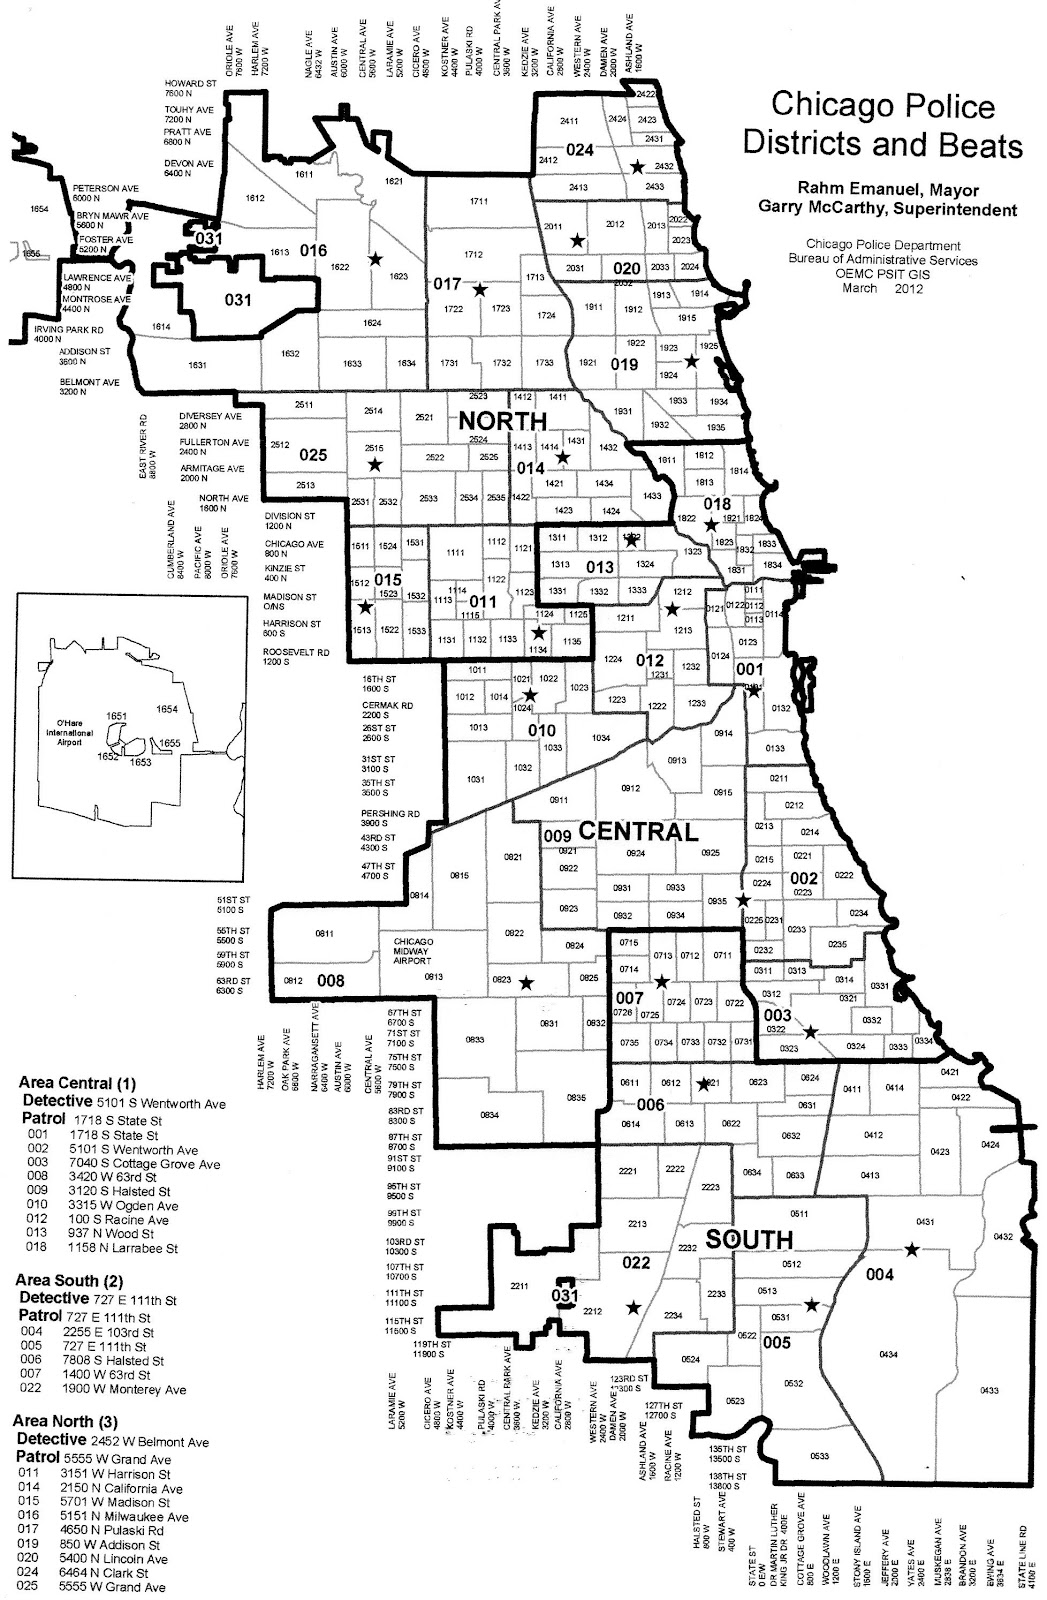

In [210]:
Image('/Users/kenlitton/Chicago beats.png')

In [208]:
df.groupby('Beat')['CrimeCount'].sum().sort_values(ascending = False)

Beat
421     4326
624     3689
423     3667
621     3183
612     3168
1011    3115
511     3030
1533    2998
631     2959
1522    2956
1112    2896
414     2877
533     2845
321     2794
512     2769
712     2720
522     2676
713     2676
823     2636
312     2585
1133    2580
831     2529
424     2506
1532    2495
825     2482
513     2476
1122    2471
1021    2436
832     2425
725     2402
        ... 
2122     341
2124     340
2331     337
1921     319
2132     313
2112     312
1313     286
121      283
1333     282
2324     266
1813     246
2312     235
235      223
2332     222
1621     214
2131     205
1322     200
2113     196
2313     192
134      184
1651     175
2322     166
2333     157
1654     154
2323     143
2111     136
1653     128
2133      68
1655      66
1652      61
Name: CrimeCount, dtype: int64

In [53]:
beat421 = df.loc[df['Beat'] == 421]

In [54]:
beat421.values.shape

(2048, 6)

In [69]:
beat421.head()

,Beat,CrimeCount,Year,Month,DayWeek,Hour
Date,,,,,,
2010-01-01,421,1,2010,1,4,0
2010-01-02,421,1,2010,1,5,0
2010-01-03,421,1,2010,1,6,0
2010-01-04,421,1,2010,1,0,0
2010-01-05,421,2,2010,1,1,0


In [55]:
from sklearn.model_selection import GridSearchCV
import itertools
import statsmodels.api as sm
import warnings

In [194]:
p = d = q = range(0,2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [94]:
#print(seasonal_pdq)

In [195]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_exp, order=param, seasonal_order=param_seasonal, enforce_stationarity=False, enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
            
            
             

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:8574.24700132698
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:6590.860809724325
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:7667.318316450282
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:6626.422723685947
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:7292.6276621546685
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:6592.859125598109
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:8624.19583096945
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:8174.110872855683
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:7919.024800942716
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:6589.81278542582
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:7649.128755163771
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:6625.223998302953
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:7294.577126213455
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:6591.81139960855
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:7974.649577182455
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:7975.770162127204
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:7977.868476911594
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:7975.796288194011
ARIMA(0, 1, 0

In [196]:
mod = sm.tsa.statespace.SARIMAX(y_exp,
                                order=(0, 1, 1),
                                seasonal_order=(1, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9946      0.003   -395.118      0.000      -1.000      -0.990
ar.S.L12       0.0243      0.023      1.072      0.284      -0.020       0.069
sigma2         1.4765      0.031     47.821      0.000       1.416       1.537


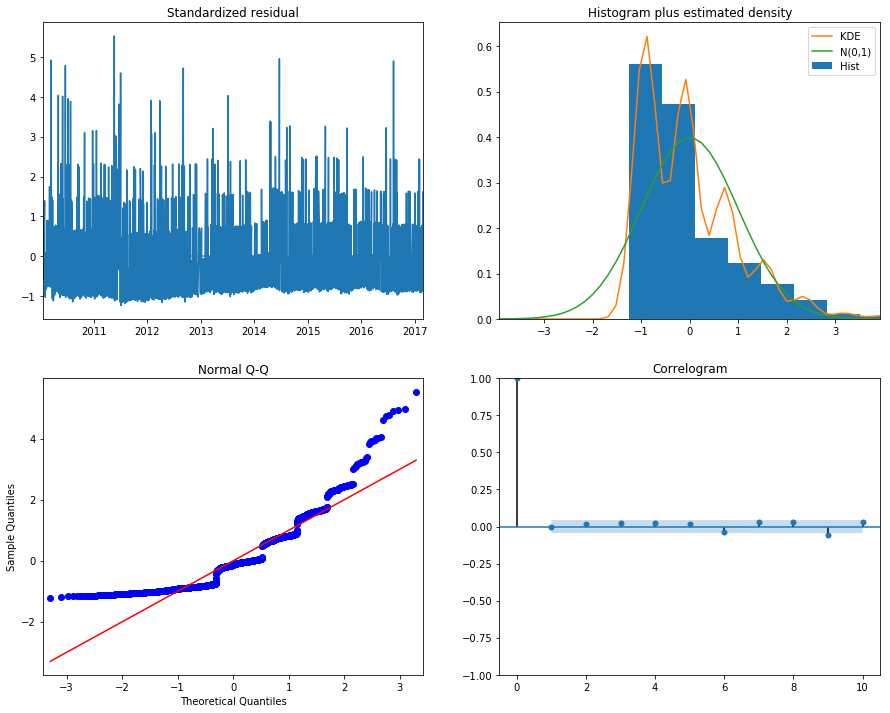

In [197]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [136]:
beat421.index

Index(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04', '2010-01-05',
       '2010-01-08', '2010-01-10', '2010-01-11', '2010-01-12', '2010-01-13',
       ...
       '2017-02-13', '2017-02-14', '2017-02-17', '2017-02-19', '2017-02-22',
       '2017-02-24', '2017-02-25', '2017-02-26', '2017-02-27', '2017-02-28'],
      dtype='object', name='Date', length=2048)

In [198]:
# warnings.filterwarnings("ignore")

pred = results.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_ci = pred.conf_int()

In [199]:
# pred

In [200]:
# pred.predicted_mean.plot(y['2016':].plot())

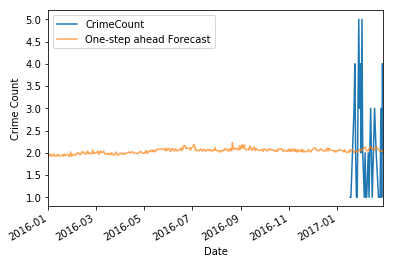

In [206]:
ax = y_exp[2016:].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

# ax.fill_between(pred_ci.index,
#                 pred_ci.iloc[:, 0],
#                 pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Crime Count')
plt.legend()

plt.show()

In [207]:
y_forecasted = pred.predicted_mean
y_truth = y_exp['2016-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth['CrimeCount']) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1.25
